# **0. Import thư viện**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# **1. Phân tích & khám phá dữ liệu(EDA)**

Nhập dữ liệu + xem qua cấu trúc dataset

In [3]:
filepath="https://raw.githubusercontent.com/mmm-pygame/Final-Project-Machine-Learning/refs/heads/main/data/raw/train.csv"
df=pd.read_csv(filepath)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Khám phá tính chất các cột kiểu dữ liệu số

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Dùng value_counts() lên cột có dữ liệu không thuộc dạng số

In [5]:
non_numeric_cols  = df.columns[df.dtypes.apply(lambda x: x not in ['int64','float64'])].to_list()
for col in non_numeric_cols:
  display(df[col].value_counts())

,count
Name,
"Dooley, Mr. Patrick",1
"Braund, Mr. Owen Harris",1
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1
"Heikkinen, Miss. Laina",1
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
...,...
"Hewlett, Mrs. (Mary D Kingcome)",1
"Vestrom, Miss. Hulda Amanda Adolfina",1
"Andersson, Mr. Anders Johan",1


,count
Sex,
male,577
female,314


,count
Ticket,
347082,7
1601,7
CA. 2343,7
3101295,6
CA 2144,6
...,...
PC 17590,1
17463,1
330877,1


,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


,count
Embarked,
S,644
C,168
Q,77


Minh họa bằng histogram các đặc trưng numerical liên tục

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >]], dtype=object)

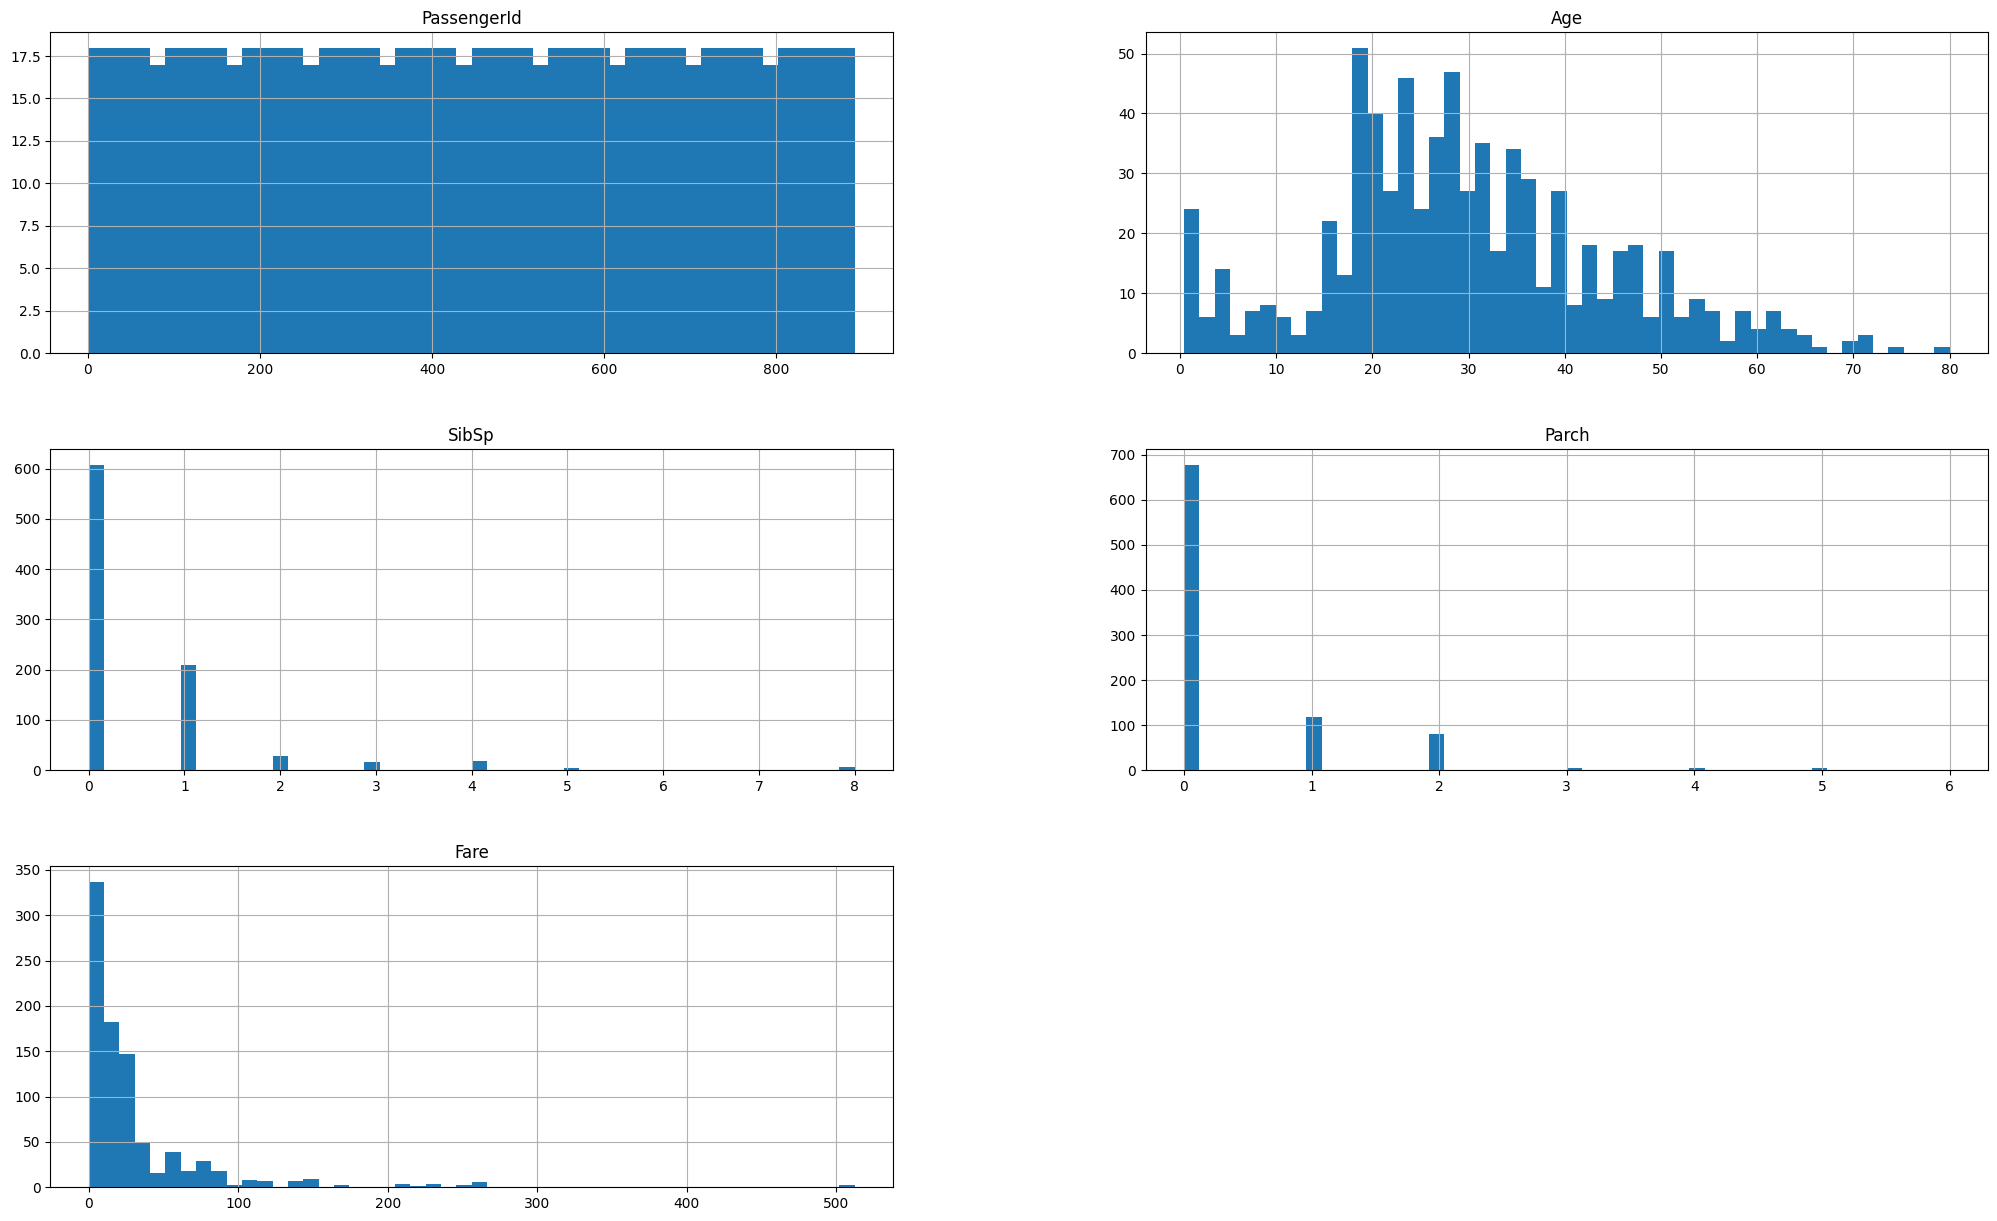

In [6]:
df.drop(columns=['Survived','Pclass']).hist(bins=50,figsize=(25,15))

Minh họa đặc trưng non-numerical bằng bar plot



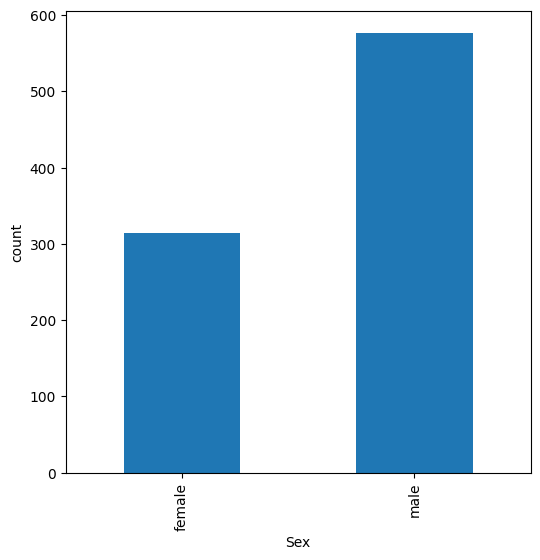

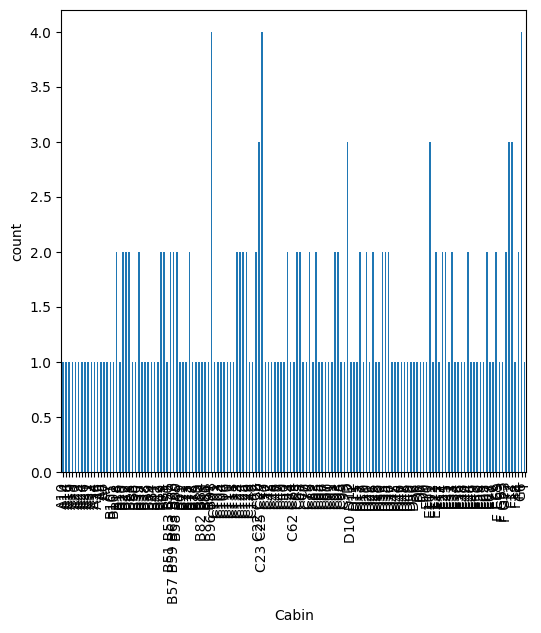

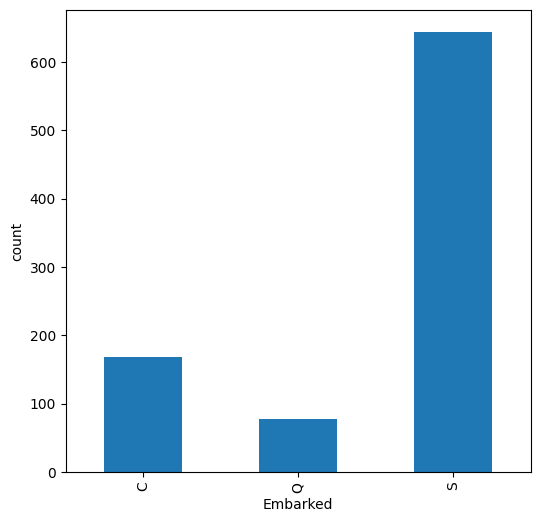

In [7]:
for i in ['Sex','Cabin','Embarked']:
  df[i].value_counts().sort_index().plot(kind='bar',xlabel=i,ylabel='count',figsize=(6,6))
  plt.show()

Độ tương quan các đặc trưng numerical(heatmap)

<Axes: >

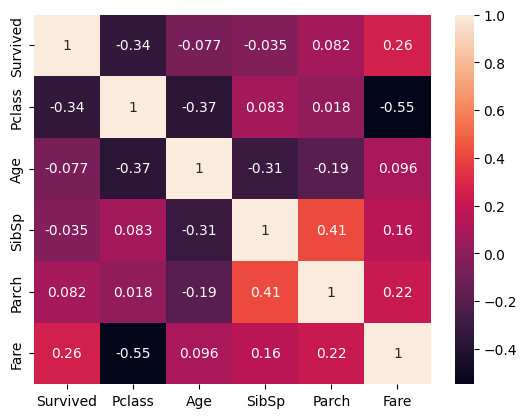

In [8]:
corr_m=df[df.columns[df.columns.to_series().apply(lambda x: df[x].dtype in ['int64','float64'] and x !='PassengerId')]].corr()
sns.heatmap(data=corr_m,annot=True)

Độ tương quan đặc trưng khác với Survived(box plot)(đã loại bỏ các đặc trưng vô nghĩa về logic như Name, PassengerId,Ticket,'Embarked')

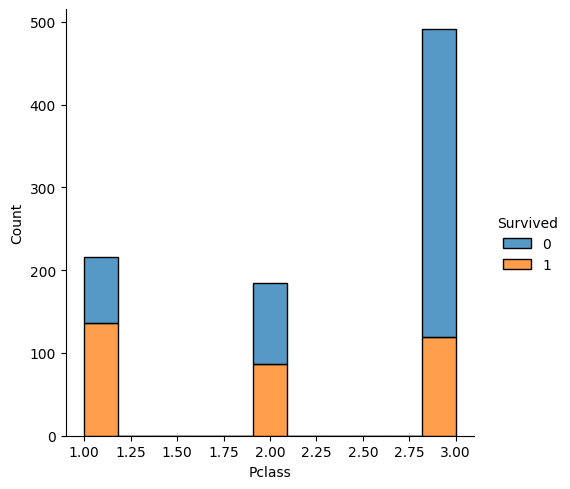

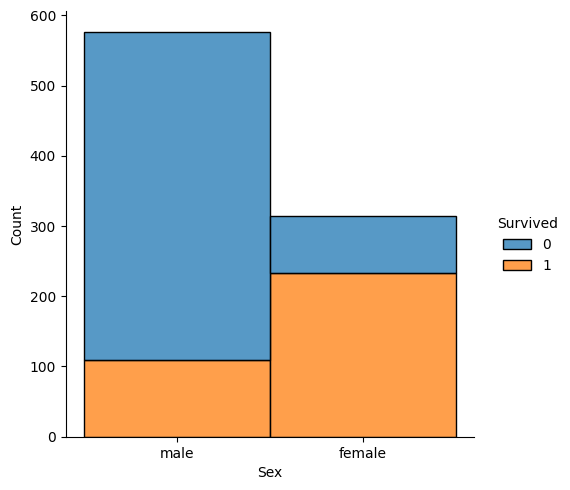

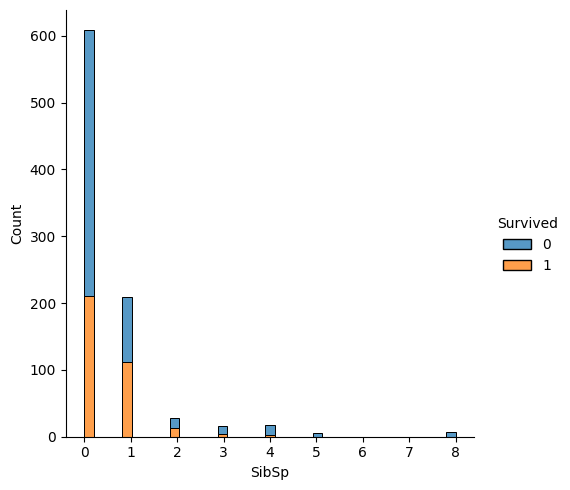

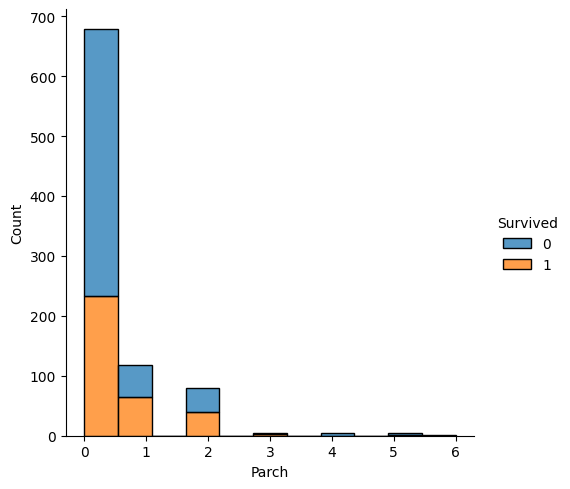

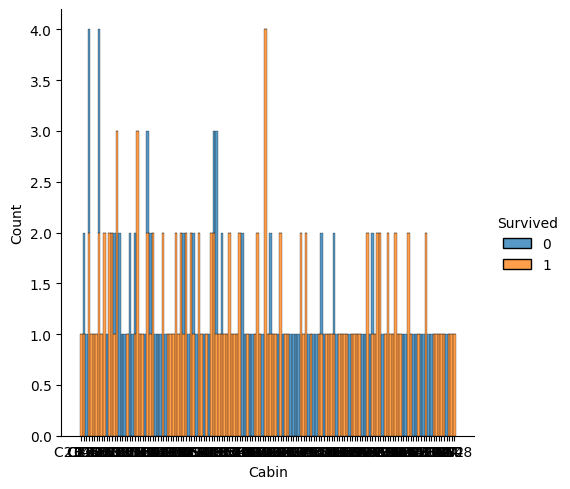

In [13]:
for i in [str(col) for col in df.columns if not col in ['Survived','PassengerId','Ticket','Name','Age','Fare','Embarked']]:
  sns.displot(data=df,hue="Survived", x=str(i),multiple='stack',bins='auto')
  plt.show()

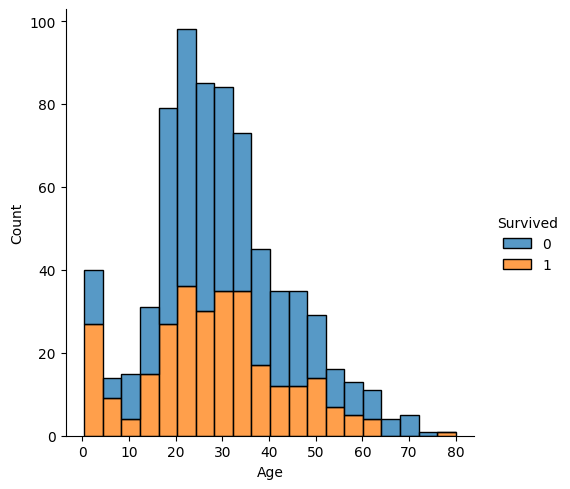

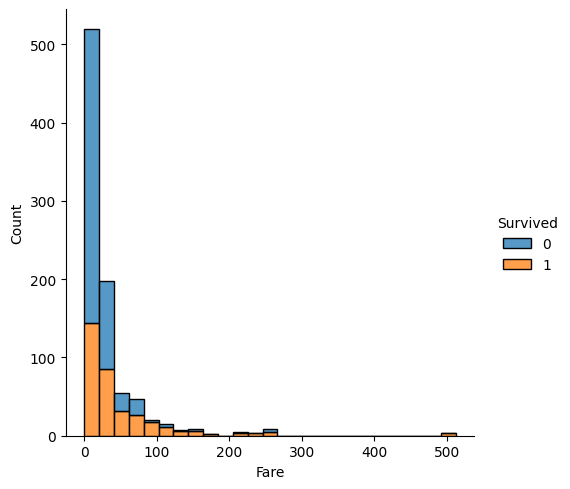

In [10]:
sns.displot(data=df,x='Age',hue='Survived',multiple='stack')
plt.show()
sns.displot(data=df,x='Fare',hue='Survived',multiple='stack',bins=25)
plt.show()

**Kết luận: Dễ thấy Sex, Pclass có độ tương quan rõ rệt với Survived. Các đặc trưng như Age, Parch, SibSp, Fare có độ tương quan không rõ ràng nhưng hội tụ về một vài điểm nhất định. Còn các đặc trưng còn lại là dữ liệu nhiễu cần loại bỏ(phi logic hoặc có sự ảnh hưởng rất ngẫu nhiên lên Survived).**